In [ ]:
# Introduction
# 사고 자동차 이미지를 수집한 AI 데이터셋으로, 차량 외관 부품의 세그멘테이션과 손상 유형 및 범위를 이해할 수 있는 형태로 가공된 다양한 차종 및 부품에 대한 학습 데이터셋 구축

In [ ]:
# Obgective
# 자동차 사고 시 발생하는 다양한 유형의 사고 이미지로부터 손상 유형, 손상 부위, 손상 심각도를 도출해낼 수 있는 인공지능 개발을 위한 데이터셋

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from glob import glob
from typing import *
from IPython.display import Image as IPImage
from sklearn.model_selection import train_test_split
import random
import os
import shutil
from PIL import Image as Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import ConcatDataset
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F

In [ ]:
# Damaged Veichle Data_Sample.zip 파일을 압축 해제

import zipfile
import os

# 파일 경로를 지정합니다.
zip_file_path = '/content/Damaged Veichle Data_Sample.zip'  # 실제 파일 경로로 변경해야 합니다.

# 압축 해제할 디렉토리 경로를 지정합니다. (현재 디렉토리에 압축을 해제합니다.)
extract_dir = '/content'

# 압축 파일이 존재하는지 확인합니다.
if not os.path.exists(zip_file_path):
    print(f"Error: {zip_file_path} not found.")
else:
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted {zip_file_path} to {extract_dir}")

    except zipfile.BadZipFile:
        print(f"Error: {zip_file_path} is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")

Successfully extracted /content/Damaged Car_Sample Data.zip to /content


In [ ]:
# /content/Damaged Veichle Data_Sample/labeling data/TL_damage/damage
import json
import glob
import os
import pandas as pd

# JSON 파일 경로 설정
json_path = '/content/Damaged Veichle Data_Sample/labeling data/TL_damage/damage/*.json'

# 모든 JSON 파일 로드
data = []

for file in glob.glob(json_path):
    with open(file, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
        #print(f"Loading data from: {file}")  # 파일 이름 출력

        # 필요한 데이터 추출
        if 'annotations' in json_data:  # annotations 키 확인
            for annotation in json_data['annotations']:
                data.append({
                    'category_id': annotation.get('category_id', None),
                    'damage': annotation.get('damage', None),
                    'color': annotation.get('color', None),
                    'year': annotation.get('year', None),
                    #'image_id': annotation.get('image_id', None),
                    'file_name': json_data['images']['file_name']  # 이미지 파일 이름 추가
                })

# 데이터프레임 생성
df = pd.DataFrame(data)

In [ ]:
df

,category_id,damage,color,year,file_name
0,sc-189759,Scratched,White,2016,0321423_sc-189759.jpg
1,sc-131286,Breakage,White,2018,0135588_sc-131286.jpg
2,sc-131286,Scratched,White,2018,0135588_sc-131286.jpg
3,sc-225082,Scratched,White,2019,0492088_sc-225082.jpg
4,sc-176404,Scratched,White,2016,0389649_sc-176404.jpg
...,...,...,...,...,...
3793,as-0099411,Separated,White,2019,0492092_as-0099411.jpg
3794,as-3341421,Breakage,Others,2016,0038205_as-3341421.jpg
3795,as-3341421,Scratched,Others,2016,0038205_as-3341421.jpg
3796,sc-229121,Scratched,White,2017,0095921_sc-229121.jpg


In [ ]:
print(df.to_string(index=False))  # 인덱스 없이 출력

category_id    damage     color  year              file_name
  sc-189759 Scratched     White  2016  0321423_sc-189759.jpg
  sc-131286  Breakage     White  2018  0135588_sc-131286.jpg
  sc-131286 Scratched     White  2018  0135588_sc-131286.jpg
  sc-225082 Scratched     White  2019  0492088_sc-225082.jpg
  sc-176404 Scratched     White  2016  0389649_sc-176404.jpg
  sc-176404  Breakage     White  2016  0389649_sc-176404.jpg
  sc-222185 Scratched     White  2020  0315573_sc-222185.jpg
  sc-222185 Scratched     White  2020  0315573_sc-222185.jpg
  sc-222185 Separated     White  2020  0315573_sc-222185.jpg
 as-0094851 Scratched     Black  2016 0339228_as-0094851.jpg
  sc-134032 Scratched     White  2016  0480090_sc-134032.jpg
  sc-134032 Scratched     White  2016  0480090_sc-134032.jpg
  sc-134032 Scratched     White  2016  0480090_sc-134032.jpg
  sc-134032 Scratched     White  2016  0480090_sc-134032.jpg
  sc-134032 Separated     White  2016  0480090_sc-134032.jpg
  sc-168358 Scratched   

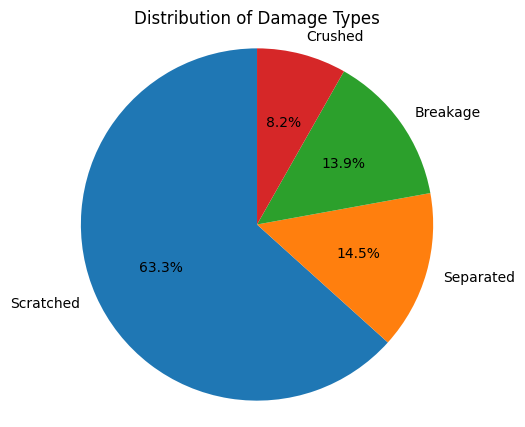

In [ ]:
# prompt: 파이차트로 damage의 비중을 나타내는 코드를 만들어줘

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame as defined in the previous code

# Count the occurrences of each damage type
damage_counts = df['damage'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))  # Adjust figure size as needed
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Damage Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# prompt: df에서 filename에 따른 damage 유형을 확인하는 코드를 만들어줘

# Display damage types for each filename
filename_damage = df.groupby('file_name')['damage'].apply(list)
filename_damage

,damage
file_name,
0000459_sc-226797.jpg,[Separated]
0000802_as-7929891.jpg,"[Crushed, Scratched]"
0001061_sc-123724.jpg,"[Separated, Scratched, Scratched, Scratched, S..."
0001146_sc-149689.jpg,[Breakage]
0001505_as-2951606.jpg,"[Breakage, Separated, Separated, Crushed]"
...,...
0505076_sc-207368.jpg,"[Crushed, Scratched, Scratched, Scratched, Cru..."
0505091_as-0100005.jpg,"[Separated, Breakage]"
0505154_as-7511257.jpg,"[Breakage, Scratched]"


In [ ]:
# prompt: filename_damage에서 damage 가 2개 이상 적힌 file_name만 나타내는 코드를 만들어줘

filtered_filenames = filename_damage[filename_damage.apply(len) >= 2].index

# 필터링된 파일 이름 출력
filtered_filenames

Index(['0000802_as-7929891.jpg', '0001061_sc-123724.jpg',
       '0001505_as-2951606.jpg', '0002011_as-0097507.jpg',
       '0003420_sc-138198.jpg', '0003951_as-0097459.jpg',
       '0004038_as-3393474.jpg', '0004566_sc-195121.jpg',
       '0004696_as-3293974.jpg', '0005959_as-7889759.jpg',
       ...
       '0504565_sc-213981.jpg', '0504606_sc-103986.jpg',
       '0504651_as-0094247.jpg', '0504653_as-0094247.jpg',
       '0505075_sc-207368.jpg', '0505076_sc-207368.jpg',
       '0505091_as-0100005.jpg', '0505154_as-7511257.jpg',
       '0506223_as-7125576.jpg', '0506224_as-3233185.jpg'],
      dtype='object', name='file_name', length=855)

In [ ]:
# prompt: file_name에서 damage 가 2개 이상 적힌 것만 groupby로 묶어서 시각화하는 코드를 만들어줘

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame as defined in the previous code

# Filter out file_names with less than two damage entries
filtered_df = df.groupby('file_name').filter(lambda x: len(x) >= 2)


In [ ]:
filtered_df

,category_id,damage,color,year,file_name
1,sc-131286,Breakage,White,2018,0135588_sc-131286.jpg
2,sc-131286,Scratched,White,2018,0135588_sc-131286.jpg
4,sc-176404,Scratched,White,2016,0389649_sc-176404.jpg
5,sc-176404,Breakage,White,2016,0389649_sc-176404.jpg
6,sc-222185,Scratched,White,2020,0315573_sc-222185.jpg
...,...,...,...,...,...
3793,as-0099411,Separated,White,2019,0492092_as-0099411.jpg
3794,as-3341421,Breakage,Others,2016,0038205_as-3341421.jpg
3795,as-3341421,Scratched,Others,2016,0038205_as-3341421.jpg
3796,sc-229121,Scratched,White,2017,0095921_sc-229121.jpg


In [ ]:
# prompt: filtered_df에서 category_id만 중복되지 않게 명시하는 코드와 category_id의 개수를 확인하는 코드를 만들어줘

# Display unique category IDs in filtered_df
unique_category_ids = filtered_df['category_id'].unique()


In [ ]:
unique_category_ids

array(['sc-131286', 'sc-176404', 'sc-222185', 'sc-134032', 'as-7191341',
       'sc-174167', 'sc-129349', 'as-3125632', 'as-3113640', 'as-0097997',
       'sc-219318', 'sc-184836', 'as-7836327', 'sc-129141', 'as-3338867',
       'sc-205339', 'sc-207823', 'sc-179792', 'sc-221154', 'sc-163472',
       'sc-103946', 'sc-152350', 'sc-194974', 'as-2698561', 'sc-167124',
       'sc-207821', 'sc-146771', 'sc-160940', 'as-0099853', 'sc-154851',
       'sc-228831', 'sc-216409', 'as-0094462', 'sc-159499', 'sc-156179',
       'sc-164874', 'as-0094388', 'as-0094855', 'as-3115203', 'sc-213981',
       'sc-113371', 'sc-202234', 'sc-156884', 'as-0098460', 'as-0094824',
       'as-2937509', 'as-3281256', 'sc-160748', 'sc-209469', 'sc-219901',
       'sc-139776', 'sc-136019', 'sc-141225', 'as-3168255', 'sc-195762',
       'as-2939014', 'sc-129144', 'sc-146509', 'sc-132513', 'as-3206512',
       'sc-161209', 'as-7098861', 'sc-148790', 'as-2622640', 'sc-127733',
       'sc-197647', 'sc-181235', 'sc-222333

In [ ]:
# Count the number of unique category IDs
num_unique_category_ids = len(unique_category_ids)
print("\nNumber of Unique Category IDs:", num_unique_category_ids)


Number of Unique Category IDs: 769


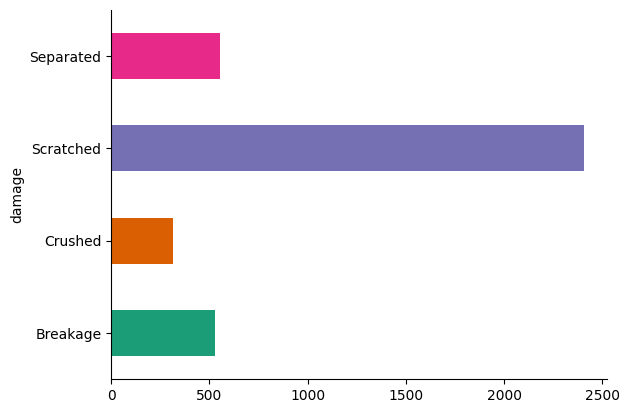

In [ ]:
# # @title damage

# from matplotlib import pyplot as plt
# import seaborn as sns
# df.groupby('damage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# # 'damage' 열에 값이 있는 행만 선택
# df_filtered_1 = df[df['damage'].notna()]

# #중복 제거 (선택 사항)
# df_filtered_1 = df_filtered.drop_duplicates()

# # 결과 출력
# df_filtered_1

,category_id,damage,color,year,file_name
0,sc-189759,Scratched,White,2016,0321423_sc-189759.jpg
1,sc-131286,Breakage,White,2018,0135588_sc-131286.jpg
2,sc-131286,Scratched,White,2018,0135588_sc-131286.jpg
3,sc-225082,Scratched,White,2019,0492088_sc-225082.jpg
4,sc-176404,Scratched,White,2016,0389649_sc-176404.jpg
...,...,...,...,...,...
3793,as-0099411,Separated,White,2019,0492092_as-0099411.jpg
3794,as-3341421,Breakage,Others,2016,0038205_as-3341421.jpg
3795,as-3341421,Scratched,Others,2016,0038205_as-3341421.jpg
3796,sc-229121,Scratched,White,2017,0095921_sc-229121.jpg


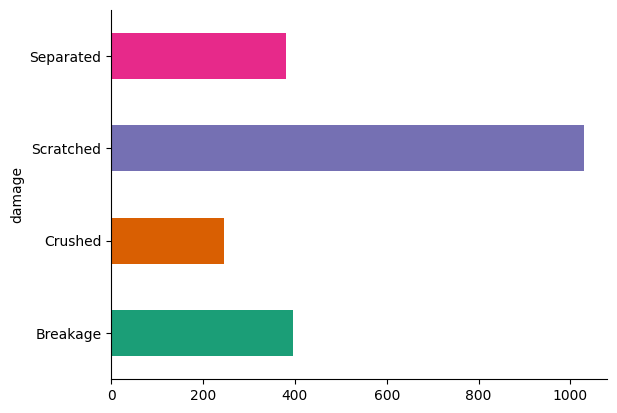

In [ ]:
# # @title damage

# from matplotlib import pyplot as plt
# import seaborn as sns
# df_filtered_1.groupby('damage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

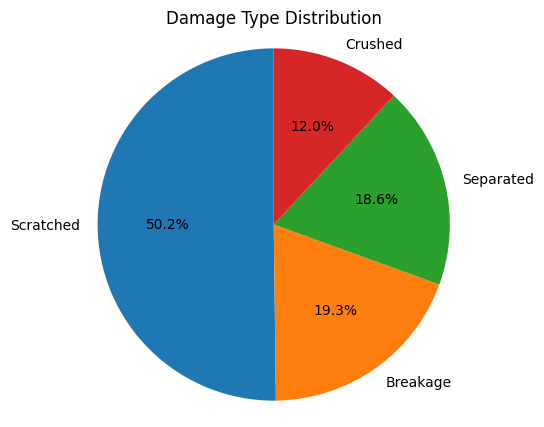

In [ ]:
# # prompt: df_filtered_1를 바탕으로, 파이차트에 손상 유형별 %를 나타내는 코드를 만들어줘

# import matplotlib.pyplot as plt

# # 'damage' 열의 값별 개수를 계산
# damage_counts = df_filtered_1['damage'].value_counts()

# # 파이 차트 생성
# plt.figure(figsize=(5, 5))
# plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title('Damage Type Distribution')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

In [ ]:
# RGBA를 RGB로 변환하여 crop된 사진 파일 생성
import json
import os
from PIL import Image
import glob

def crop_damages(image_path, json_path, output_dir):

    """
    Crops images based on bounding box coordinates from a JSON file.
    """
    try:
        with open(json_path, 'r') as f:
            json_data = json.load(f)
    except FileNotFoundError:
        print(f"Error: JSON file not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON file at {json_path}")

        return

    try:
        with Image.open(image_path) as img:
            # Convert image to RGB mode if it's RGBA
            if img.mode == 'RGBA':
                img = img.convert('RGB')

            image_name = os.path.splitext(os.path.basename(image_path))[0]

            for i, annotation in enumerate(json_data['annotations']):
                bbox = annotation['bbox']
                damage_type = annotation['damage']
                left, top, width, height = bbox
                right = left + width
                bottom = top + height

                try:
                    cropped_img = img.crop((left, top, right, bottom))
                    # Convert cropped image to RGB if necessary
                    if cropped_img.mode == 'RGBA':
                        cropped_img = cropped_img.convert('RGB')

                    resized_img = cropped_img.resize((50, 50))

                    output_filename = f"{image_name}_{damage_type.lower()}_{i+1}.jpg"
                    output_path = os.path.join(output_dir, output_filename)
                    resized_img.save(output_path, 'JPEG')

                except Exception as e:
                    print(f"Error cropping image {image_path}: {e}")
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

def process_images(image_dir, json_dir, output_base_dir):

    """
    Processes all images in the specified directory.
    """
    if not os.path.exists(output_base_dir):
        os.makedirs(output_base_dir)

    image_files = glob.glob(os.path.join(image_dir, '*.jpg'))
    for image_path in image_files:
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        json_name = image_name + '.json'
        json_path = os.path.join(json_dir, json_name)

        output_dir = os.path.join(output_base_dir, image_name + "_crops")
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        crop_damages(image_path, json_path, output_dir)

# Example usage
image_directory = '/content/Damaged Veichle Data_Sample/raw data/TS_damage/damage/'
json_directory = '/content/Damaged Veichle Data_Sample/labeling data/TL_damage/damage/'
output_directory = '/content/crop_images'

process_images(image_directory, json_directory, output_directory)

분류 모델 만들기

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
def prepare_dataset(base_dir):
    images = []
    labels = []
    damage_types = ['Separated', 'Breakage', 'Scratched', 'Crushed']

    # base_dir 경로에 있는 모든 디렉토리를 순회
    for damage_type in os.listdir(base_dir):
        for img_name in os.listdir(os.path.join(base_dir, damage_type)):
            img_path = os.path.join(base_dir, damage_type, img_name)
            img = Image.open(img_path)

             # 이미지 로드 및 정규화
            img_array = np.array(img) / 255.0
            images.append(img_array)

            # 손상 유형에 따른 레이블링
            for idx, d_type in enumerate(damage_types):
                if d_type in img_name.lower():
                    labels.append(idx)
                    break

    return np.array(images), np.array(labels)


------------------------------------------------------------------------------

crop_images 의 사진의 damage를 숫자로 라벨링


In [ ]:
# crop_images 내 파일 모두 불러오기
glob.glob('/content/crop_images/*/*')

['/content/crop_images/0006633_as-0099425_crops/0006633_as-0099425_separated_2.jpg',
 '/content/crop_images/0006633_as-0099425_crops/0006633_as-0099425_breakage_1.jpg',
 '/content/crop_images/0120973_sc-224614_crops/0120973_sc-224614_scratched_1.jpg',
 '/content/crop_images/0120973_sc-224614_crops/0120973_sc-224614_scratched_2.jpg',
 '/content/crop_images/0449686_as-9073870_crops/0449686_as-9073870_scratched_2.jpg',
 '/content/crop_images/0449686_as-9073870_crops/0449686_as-9073870_breakage_1.jpg',
 '/content/crop_images/0281634_sc-200560_crops/0281634_sc-200560_separated_1.jpg',
 '/content/crop_images/0133706_sc-147416_crops/0133706_sc-147416_scratched_1.jpg',
 '/content/crop_images/0133706_sc-147416_crops/0133706_sc-147416_scratched_2.jpg',
 '/content/crop_images/0215116_as-2988407_crops/0215116_as-2988407_crushed_4.jpg',
 '/content/crop_images/0215116_as-2988407_crops/0215116_as-2988407_separated_2.jpg',
 '/content/crop_images/0215116_as-2988407_crops/0215116_as-2988407_separated_3.

In [ ]:
# 사진에 따른 damage 유형을 데이터 프레임으로 만들기
df_all = pd.DataFrame(glob.glob('/content/crop_images/*/*'), columns=['file_name'])
df_all

,file_name
0,/content/crop_images/0006633_as-0099425_crops/...
1,/content/crop_images/0006633_as-0099425_crops/...
2,/content/crop_images/0120973_sc-224614_crops/0...
3,/content/crop_images/0120973_sc-224614_crops/0...
4,/content/crop_images/0449686_as-9073870_crops/...
...,...
3793,/content/crop_images/0470361_sc-145728_crops/0...
3794,/content/crop_images/0470361_sc-145728_crops/0...
3795,/content/crop_images/0470361_sc-145728_crops/0...
3796,/content/crop_images/0470361_sc-145728_crops/0...


In [ ]:
df_all['damage'] = df_all['file_name'].apply(lambda x: x.split('_')[-2])
df_all

,file_name,damage
0,/content/crop_images/0006633_as-0099425_crops/...,separated
1,/content/crop_images/0006633_as-0099425_crops/...,breakage
2,/content/crop_images/0120973_sc-224614_crops/0...,scratched
3,/content/crop_images/0120973_sc-224614_crops/0...,scratched
4,/content/crop_images/0449686_as-9073870_crops/...,scratched
...,...,...
3793,/content/crop_images/0470361_sc-145728_crops/0...,scratched
3794,/content/crop_images/0470361_sc-145728_crops/0...,scratched
3795,/content/crop_images/0470361_sc-145728_crops/0...,scratched
3796,/content/crop_images/0470361_sc-145728_crops/0...,scratched


In [ ]:
# damage type을 {'Separated':0, 'Breakage':1, 'Scratched':2, 'Crushed':3}으로 라벨링
damage_types = {'Separated':0, 'Breakage':1, 'Scratched':2, 'Crushed':3}

In [ ]:
# df_all의 damage를 숫자로 라벨링
df_all['label'] = df_all['damage'].apply(lambda x: damage_types.get(x.capitalize(), -1))
df_all.head(20)

,file_name,damage,label
0,/content/crop_images/0006633_as-0099425_crops/...,separated,0
1,/content/crop_images/0006633_as-0099425_crops/...,breakage,1
2,/content/crop_images/0120973_sc-224614_crops/0...,scratched,2
3,/content/crop_images/0120973_sc-224614_crops/0...,scratched,2
4,/content/crop_images/0449686_as-9073870_crops/...,scratched,2
5,/content/crop_images/0449686_as-9073870_crops/...,breakage,1
6,/content/crop_images/0281634_sc-200560_crops/0...,separated,0
7,/content/crop_images/0133706_sc-147416_crops/0...,scratched,2
8,/content/crop_images/0133706_sc-147416_crops/0...,scratched,2
9,/content/crop_images/0215116_as-2988407_crops/...,crushed,3


In [ ]:
# 사진의 damage를 숫자로 labeling 한 데이터를 y에 저장하기 --> array
y = df_all['label'].values
y

array([0, 1, 2, ..., 2, 2, 2])

In [ ]:
y[:20]

array([0, 1, 2, 2, 2, 1, 0, 2, 2, 3, 0, 0, 1, 2, 2, 3, 3, 2, 2, 2])

In [ ]:
y.shape

(3798,)

In [ ]:
# crop_images 안의 모든 사진의 픽셀을 255로 나누어 정규화한 후, array 형식으로 바꾸어 x에 저장하기
x = np.array([np.array(Image.open(file))/255.0 for file in df_all['file_name']])
x

array([[[[0.41176471, 0.43137255, 0.44705882],
         [0.39607843, 0.41568627, 0.43137255],
         [0.42745098, 0.44705882, 0.4627451 ],
         ...,
         [0.05490196, 0.05882353, 0.06666667],
         [0.03137255, 0.03529412, 0.04313725],
         [0.02745098, 0.03137255, 0.03921569]],

        [[0.43921569, 0.45882353, 0.4745098 ],
         [0.42352941, 0.44313725, 0.45882353],
         [0.42745098, 0.44705882, 0.4627451 ],
         ...,
         [0.05490196, 0.05882353, 0.06666667],
         [0.01960784, 0.02352941, 0.03137255],
         [0.01960784, 0.02352941, 0.03137255]],

        [[0.45098039, 0.47058824, 0.48627451],
         [0.44705882, 0.46666667, 0.48235294],
         [0.43137255, 0.45098039, 0.46666667],
         ...,
         [0.06666667, 0.07058824, 0.07843137],
         [0.03529412, 0.03921569, 0.04705882],
         [0.03529412, 0.03921569, 0.04705882]],

        ...,

        [[0.1254902 , 0.12941176, 0.1372549 ],
         [0.14117647, 0.14509804, 0.15294118]

In [ ]:
x[:2]

array([[[[0.41176471, 0.43137255, 0.44705882],
         [0.39607843, 0.41568627, 0.43137255],
         [0.42745098, 0.44705882, 0.4627451 ],
         ...,
         [0.05490196, 0.05882353, 0.06666667],
         [0.03137255, 0.03529412, 0.04313725],
         [0.02745098, 0.03137255, 0.03921569]],

        [[0.43921569, 0.45882353, 0.4745098 ],
         [0.42352941, 0.44313725, 0.45882353],
         [0.42745098, 0.44705882, 0.4627451 ],
         ...,
         [0.05490196, 0.05882353, 0.06666667],
         [0.01960784, 0.02352941, 0.03137255],
         [0.01960784, 0.02352941, 0.03137255]],

        [[0.45098039, 0.47058824, 0.48627451],
         [0.44705882, 0.46666667, 0.48235294],
         [0.43137255, 0.45098039, 0.46666667],
         ...,
         [0.06666667, 0.07058824, 0.07843137],
         [0.03529412, 0.03921569, 0.04705882],
         [0.03529412, 0.03921569, 0.04705882]],

        ...,

        [[0.1254902 , 0.12941176, 0.1372549 ],
         [0.14117647, 0.14509804, 0.15294118]

In [ ]:
x.shape

(3798, 50, 50, 3)

In [ ]:

# 데이터 분할 (train:0.8, validation:0.1, test:0.1)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False, random_state=42)


In [ ]:
# CNN 딥러닝 라이브러리 호출
import tensorflow as tf
import numpy as np
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# cnn model
# 입력층 : Conv2D, BatchNormalization, MaxPooling2D, Dropout
# 은닉층1 : Conv2D, BatchNormalization, MaxPooling2D, Dropout
# 은닉층2 : Conv2D, BatchNormalization, MaxPooling2D, Dropout
# 출력층 : Flatten, Dropout

def create_cnn_model():
    model = tf.keras.Sequential([
        #data_augmentation,

        # 첫번째 컨볼루션 블록
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu', input_shape=(50, 50, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),

        # 두 번째 컨볼루션 블록
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),

        # 세 번째 컨볼루션 블록
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.25),

        # 완전 연결층
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, kernel_regularizer=l2(0.01), activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    return model


In [ ]:
# 모델 생성 및 컴파일 : 최적화함수, 손실함수, 정확도 --> model에 resnet50(pretrained=True) 적용
# Early_stopping
model = create_cnn_model()
#model = model.resnet50(pretrained=True)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 학습 : epoch=50,

In [ ]:
# test 성능 평가

In [ ]:
# train, validation의 loss 그래프 생성

In [ ]:
# train, validation의 accuracy 그래프 생성

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val))


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - accuracy: 0.4839 - loss: 24.6564 - val_accuracy: 0.1408 - val_loss: 20.4818
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - accuracy: 0.6203 - loss: 16.2166 - val_accuracy: 0.1408 - val_loss: 16.0679
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - accuracy: 0.6285 - loss: 9.6725 - val_accuracy: 0.1408 - val_loss: 12.5575
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - accuracy: 0.6429 - loss: 5.8403 - val_accuracy: 0.1408 - val_loss: 9.5023
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.6226 - loss: 4.0251 - val_accuracy: 0.1684 - val_loss: 7.1019
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 474ms/step - accuracy: 0.6244 - loss: 3.1904 - val_accuracy: 0.1684 - val_loss: 4.7373
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 498ms/step - accuracy: 0.6334 - loss: 2.6919 - val_accuracy: 0.1526 - val_loss: 4.2513
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - accuracy: 0.6436 - loss: 2.4218 - val

In [ ]:

# 테스트 세트에서 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6916 - loss: 1.1886
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


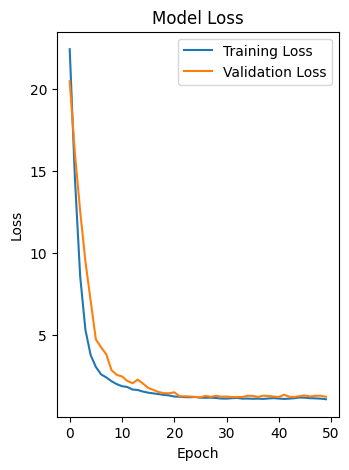

In [ ]:
# 결과 시각화
plt.figure(figsize=(8,5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


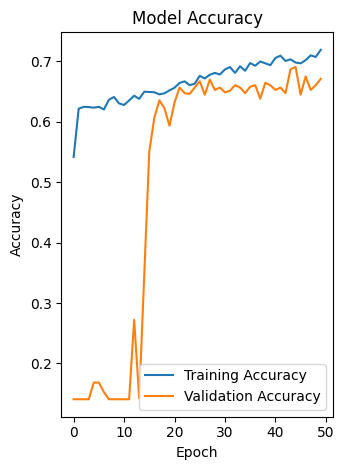

In [ ]:
# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.6763
F1 Score: 0.6154


In [ ]:
model.evaluate(X_test, y_test) # 학습시간 감소 및 과적합 방지

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6916 - loss: 1.1886


[1.20660400390625, 0.6763157844543457]

----------------------------------------------------------